In [1]:
#!pip install ewl

In [2]:
%matplotlib inline

In [3]:
from ewl import EWL
from ewl.parametrizations import U_theta_phi_lambda
from ewl.plotting import plot_payoff_function

import sympy as sp
from sympy import Array, Matrix
from sympy.physics.quantum.qubit import Qubit

sp.init_printing()

i = sp.I
pi = sp.pi
sqrt2 = sp.sqrt(2)

In [4]:
s1, s2 = sp.symbols('s1 s2', real=True)
s1, s2

In [5]:
half = sp.sympify('1/2')
half

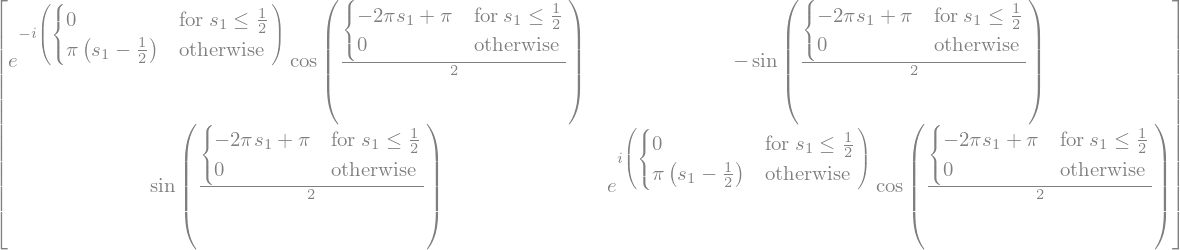

In [6]:
alice = U_theta_phi_lambda(
    theta=sp.Piecewise(
        (pi - 2 * s1 * pi, s1 <= half),
        (0, s1 > half),
    ),
    phi=sp.Piecewise(
        (0, s1 <= half),
        ((s1 - half) * pi, s1 > half),
    ),
    lambda_=sp.Piecewise(
        (0, s1 <= half),
        ((s1 - half) * pi, s1 > half),
    ),
)
alice

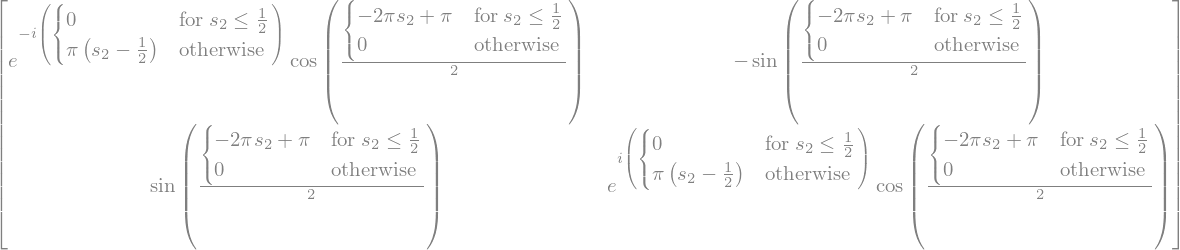

In [7]:
bob = U_theta_phi_lambda(
    theta=sp.Piecewise(
        (pi - 2 * s2 * pi, s2 <= half),
        (0, s2 > half),
    ),
    phi=sp.Piecewise(
        (0, s2 <= half),
        ((s2 - half) * pi, s2 > half),
    ),
    lambda_=sp.Piecewise(
        (0, s2 <= half),
        ((s2 - half) * pi, s2 > half),
    ),
)
bob

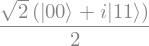

In [8]:
psi = (Qubit('00') + i * Qubit('11')) / sqrt2
psi

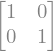

In [9]:
C = Matrix([
    [1, 0],
    [0, 1],
])
C

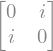

In [10]:
D = Matrix([
    [0, i],
    [i, 0],
])
D

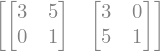

In [11]:
payoff_matrix = Array([
    [
        [3, 5],
        [0, 1],
    ],
    [
        [3, 0],
        [5, 1],
    ],
])
payoff_matrix

In [12]:
ewl = EWL(psi=psi, C=C, D=D, strategies=[alice, bob], payoff_matrix=payoff_matrix)
ewl

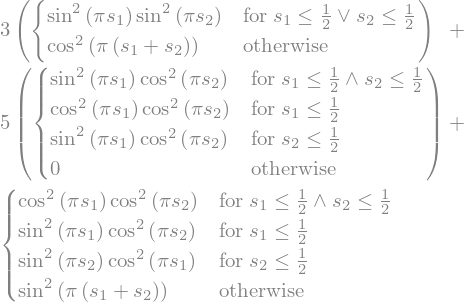

In [13]:
ewl.payoff_function(player=1, simplify=True)

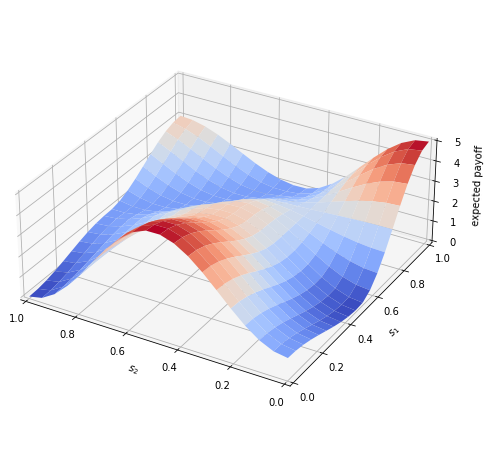

In [14]:
fig = plot_payoff_function(
    ewl, player=0,
    x=s2, x_min=1, x_max=0,
    y=s1, y_min=0, y_max=1,
    box_aspect=(1, 1, 0.4)
)